In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as ticker
import seaborn as sns
from collections import Counter

In [2]:
filepath = "KaggleData/student-mat.csv"
df = pd.read_csv(filepath)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

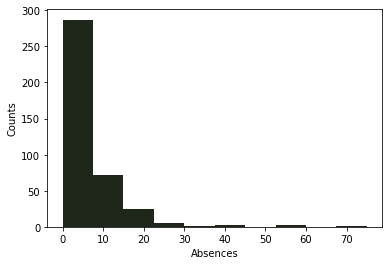

5.708860759493671
4.0
0    0
dtype: int64


In [5]:
plt.hist(df['absences'], color="#1F271B")
plt.xlabel('Absences')
plt.ylabel('Counts')
plt.show()
print(df['absences'].mean())
print(df['absences'].median())
print(df['absences'].mode())

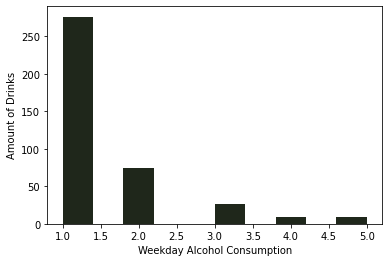

1.481012658227848
1.0
0    1
dtype: int64


In [6]:
plt.hist(df['Dalc'], color="#1F271B")
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Amount of Drinks')
plt.show()
print(df['Dalc'].mean())
print(df['Dalc'].median())
print(df['Dalc'].mode())

In [7]:
df.Dalc.value_counts()

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

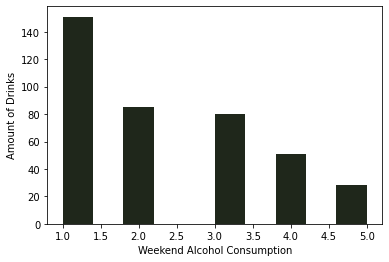

2.2911392405063293
2.0
0    1
dtype: int64


In [8]:
plt.hist(df['Walc'], color="#1F271B")
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Amount of Drinks')
plt.show()
print(df['Walc'].mean())
print(df['Walc'].median())
print(df['Walc'].mode())

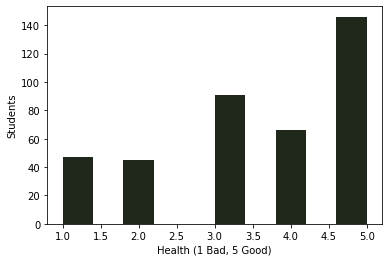

3.5544303797468353
4.0
0    5
dtype: int64


In [9]:
plt.hist(df['health'], color="#1F271B")
plt.xlabel('Health (1 Bad, 5 Good)')
plt.ylabel('Students')
plt.show()
print(df['health'].mean())
print(df['health'].median())
print(df['health'].mode())

In [10]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = df['absences'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = df.loc[(df['absences'] < lower_bound) | (df['absences'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 0.0
The upper quartile of occupancy is: 8.0
The interquartile range of occupancy is: 8.0
The the median of occupancy is: 4.0 
Values below -12.0 could be outliers.
Values above 20.0 could be outliers.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9
216,GP,F,17,U,GT3,T,4,3,other,other,...,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9
277,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,2,4,1,4,3,22,9,9,9


In [11]:
outliers_df = df.loc[df["absences"] > 20, [
    "Dalc", "Walc", "health"]]
print(outliers_df['Dalc'].mean())
print(outliers_df['Dalc'].median())
print(outliers_df['Dalc'].mode())
# health of outliers
print(outliers_df['health'].mean())
print(outliers_df['health'].median())
print(outliers_df['health'].mode())

1.4666666666666666
1.0
0    1
dtype: int64
3.1333333333333333
3.0
0    5
dtype: int64


In [12]:
healthoutliers_df = df.loc[(df["absences"] > 20) &  (df['health'] > 4), [
    "Dalc", "Walc", "health", "absences"]]
healthoutliers_df

,Dalc,Walc,health,absences
74,2,4,5,54
205,3,4,5,28
276,1,1,5,75
280,2,4,5,30
320,1,2,5,23


In [13]:
print(healthoutliers_df['Dalc'].mean())
print(healthoutliers_df['Dalc'].median())
print(healthoutliers_df['Dalc'].mode())

print(healthoutliers_df['Walc'].mean())
print(healthoutliers_df['Walc'].median())
print(healthoutliers_df['Walc'].mode())

1.8
2.0
0    1
1    2
dtype: int64
3.0
4.0
0    4
dtype: int64


In [14]:
allPlot = df.groupby(by=["absences", "health"])["Dalc"].value_counts()
allPlot.name = "allPlot"
allPlot = allPlot.reset_index()
allPlot.head()

,absences,health,Dalc,allPlot
0,0,1,1,13
1,0,2,2,6
2,0,2,1,5
3,0,2,3,1
4,0,3,1,23


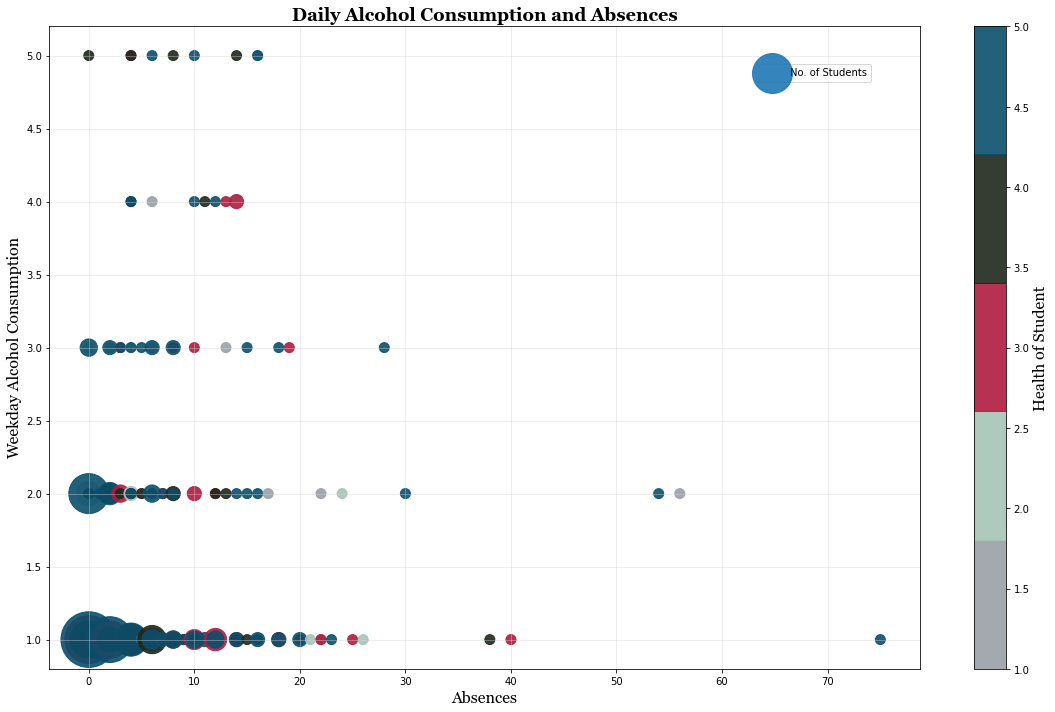

In [15]:
# All Data Points
plt.figure(figsize = (16,10))
x = allPlot['absences']
y = allPlot['Dalc']
cmap = mpl.colors.ListedColormap(["#9AA0A8", "#A7C4B5", "#AF1B3F", "#1F271B", "#0B4F6C"])

plt.scatter(x, y, c=allPlot['health'], cmap=cmap, s = allPlot["allPlot"]*100, alpha=.9, label = "No. of Students")
plt.title("Daily Alcohol Consumption and Absences", fontweight = "bold", fontname = "Georgia", fontsize = 18)
plt.xlabel("Absences", fontname = "Georgia", fontsize = 16)
plt.ylabel("Weekday Alcohol Consumption", fontname = "Georgia", fontsize = 16)
clb = plt.colorbar()
clb.set_label("Health of Student", fontname = "Georgia", fontsize = 16)


plt.grid(color = 'lightgrey', alpha = .5)


plt.legend(bbox_to_anchor=(.95,.95))
plt.tight_layout()
plt.show()

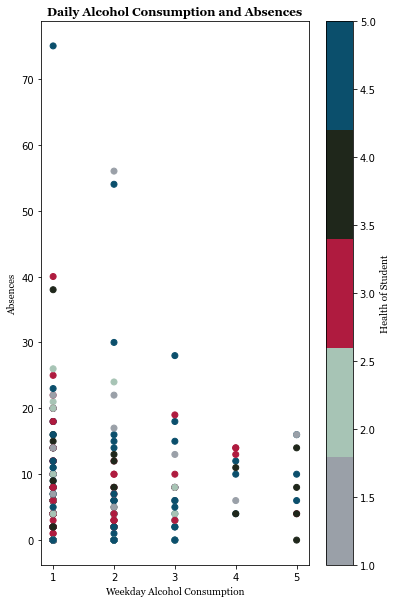

In [16]:
# Same Graph Vertically
plt.figure(figsize = (6,10))
cmap = mpl.colors.ListedColormap(["#9AA0A8", "#A7C4B5", "#AF1B3F", "#1F271B", "#0B4F6C"])
plt.scatter(df['Dalc'],df['absences'],c=df['health'], cmap=cmap)
plt.title("Daily Alcohol Consumption and Absences", fontweight = "bold", fontname = "Georgia")
plt.xlabel("Weekday Alcohol Consumption", fontname = "Georgia")
plt.ylabel("Absences", fontname = "Georgia")
clb = plt.colorbar()
clb.set_label("Health of Student", fontname = "Georgia")
plt.show()

In [17]:
healthcontrol_df = df.loc[(df['health'] >= 3), [
    "Dalc", "Walc", "health", "absences"]]

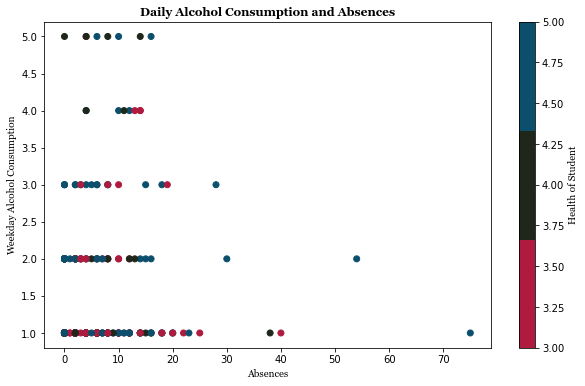

In [18]:
# Health = 3 and above
plt.figure(figsize = (10,6))
cmap = mpl.colors.ListedColormap(["#AF1B3F", "#1F271B", "#0B4F6C"])
plt.scatter(healthcontrol_df['absences'],healthcontrol_df['Dalc'],c=healthcontrol_df['health'], cmap=cmap)
plt.title("Daily Alcohol Consumption and Absences", fontweight = "bold", fontname = "Georgia")
plt.xlabel("Absences", fontname = "Georgia")
plt.ylabel("Weekday Alcohol Consumption", fontname = "Georgia")
clb = plt.colorbar()
clb.set_label("Health of Student", fontname = "Georgia")
plt.show()

In [19]:
noOutliers_df = df.loc[(df["absences"] <= 20) &  (df['health'] >= 3), [
    "Dalc", "Walc", "health", "absences"]]

In [20]:
hopeSize = noOutliers_df.groupby(by=["absences", "health"])["Dalc"].value_counts()
hopeSize.name = "hopeSize"
hopeSize = hopeSize.reset_index()
hopeSize.head()

,absences,health,Dalc,hopeSize
0,0,3,1,23
1,0,3,2,1
2,0,4,1,14
3,0,4,2,1
4,0,4,5,1


In [21]:
len(hopeSize)

93

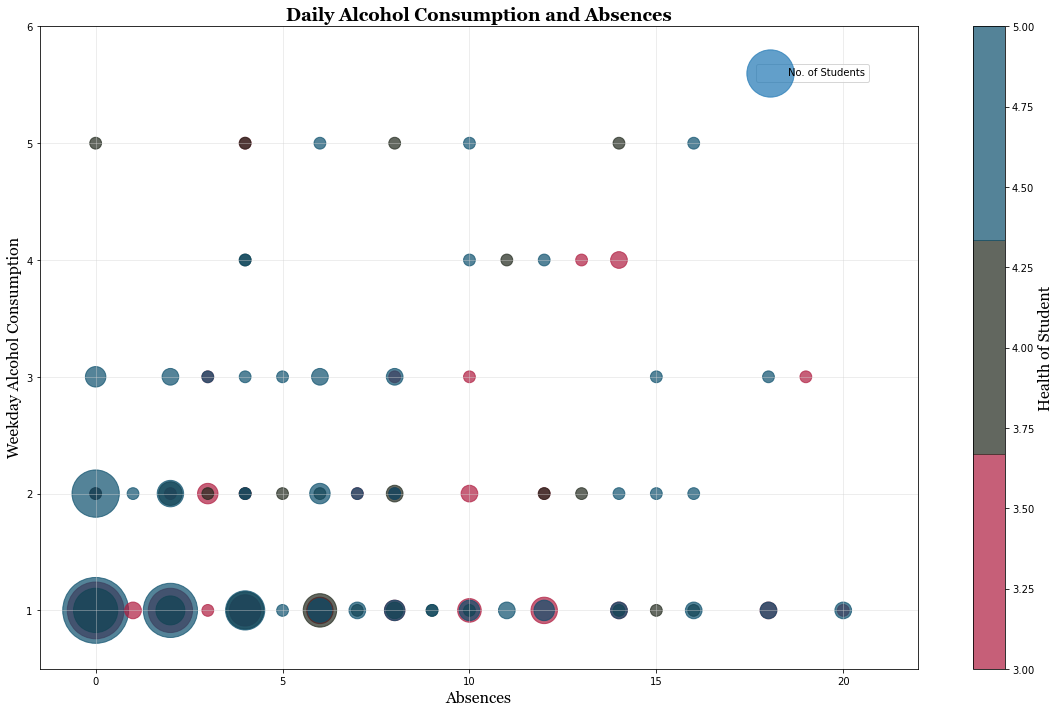

In [31]:
plt.figure(figsize = (16,10))
x = hopeSize['absences']
y = hopeSize['Dalc']
cmap = mpl.colors.ListedColormap(["#AF1B3F", "#1F271B", "#0B4F6C"])

plt.scatter(x, y, c=hopeSize['health'], cmap=cmap, s = hopeSize["hopeSize"]*140, alpha=.7, label = "No. of Students")
plt.title("Daily Alcohol Consumption and Absences", fontweight = "bold", fontname = "Georgia", fontsize = 18)
plt.xlabel("Absences", fontname = "Georgia", fontsize = 16)
plt.ylabel("Weekday Alcohol Consumption", fontname = "Georgia", fontsize = 16)
clb = plt.colorbar()
clb.set_label("Health of Student", fontname = "Georgia", fontsize = 16)

plt.xlim(-1.5, 22)
plt.ylim(.5, 6)
plt.grid(color = 'lightgrey', alpha = .5)


plt.legend(bbox_to_anchor=(.95,.95))
plt.tight_layout()
plt.show()



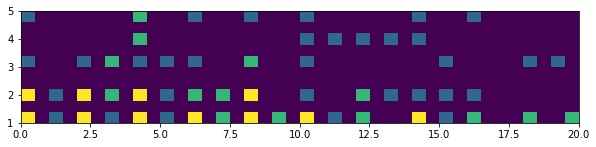

In [30]:
plt.figure(figsize = (10,6))

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(40, 10))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent = extent, origin='lower')
plt.show()

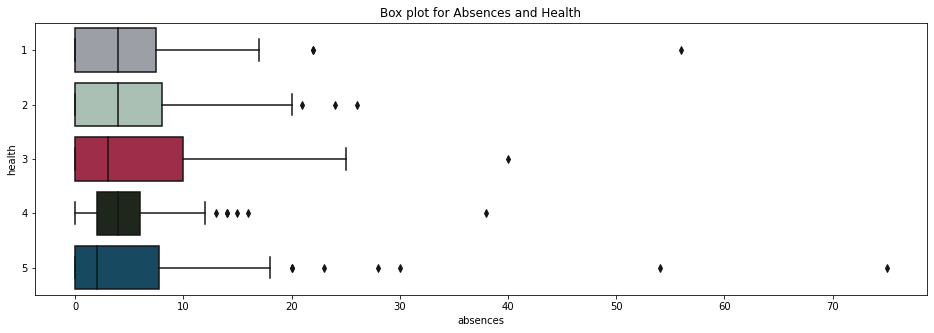

In [24]:
plt.figure(figsize=(16,5))
plt.title("Box plot for Absences and Health")
cmap = ["#9AA0A8", "#A7C4B5", "#AF1B3F", "#1F271B", "#0B4F6C"]
sns.boxplot(y="health", x="absences", data = df , orient="h", palette = cmap)

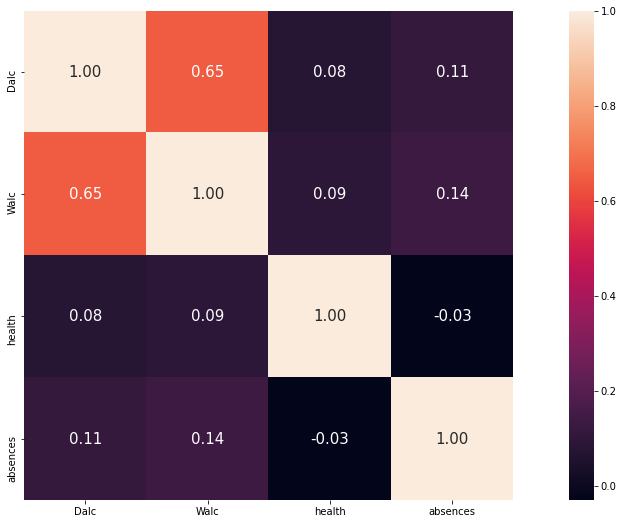

In [25]:
plt.figure(figsize=(20,9))
col = ['Dalc','Walc','health','absences']
cm = np.corrcoef(df[col].values.T)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = col, xticklabels = col)

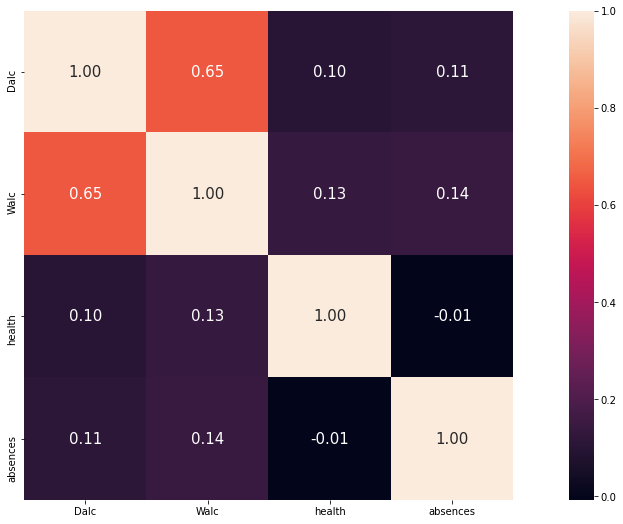

In [26]:
plt.figure(figsize=(20,9))
cols = ['Dalc','Walc','health','absences']
cm = np.corrcoef(healthcontrol_df[cols].values.T)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

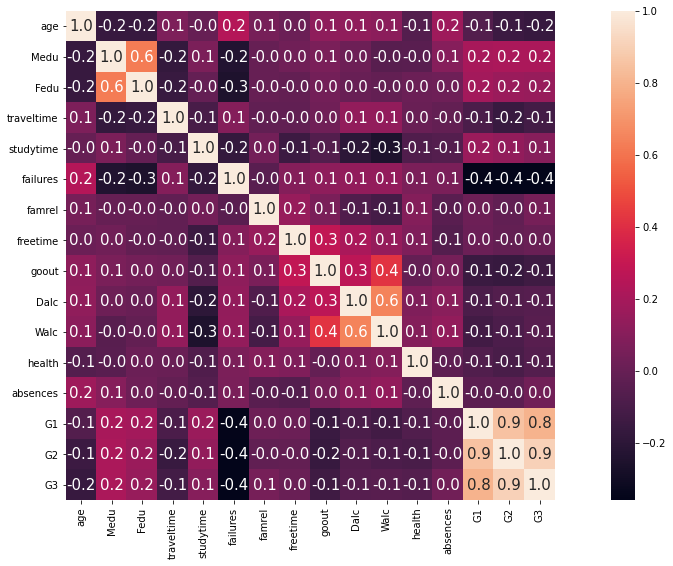

In [27]:
plt.figure(figsize=(20,9))
corr = df.corr()
sns.heatmap(corr, cbar = True, annot = True,square = True, fmt = '.1f', annot_kws = {'size':15})
plt.show()